# TorchLife

> Survival Analysis using pytorch

This library takes a deep learning approach to Survival Analysis.

## What is Survival Analysis
A lot of classification problems are actually survival analysis problems and haven't been tackled as such. For example, consider a cancer patient and you take X-ray data from that patient. Over time, patients will **eventually** die from cancer (lets ignore the case where people will die from other diseases). The usual approach is to say here is the X-ray (x) and will the patient die in the next 30 days or not (y).

Survival analysis instead asks the question given the input (x) and a time(t), what is the probability that a patient will survive for a time greater than t. Considering the training dataset if a patient is still alive, in the classification case it would be thought of as y = 0. In survival analysis we say that it is a censored observation since the patient will die at a certain time in the future when the experiment is not being conducted.

The above analogy can be thought of in other scenarios such as churn prediction as well.

A proper dive into theory can be seen [here](./SAT).

## What's with the name?
Well, if you torch a life... you probability wouldn't survive. 😬

## How to use this library
There are 3 models in here that can be used.
1. [Kaplan Meier Model]
2. [Proportional Hazard Models]
3. [Accelerated Failure Time Models]
All 3 models require you to input a pandas dataframe with the columns `"t", "e"` indicating time elapsed and a binary variable, event if a death (1) or live (0) instance is observed respectively. They are all capable of doing `fit` and `plot_survival_function`.

### Kaplan Meier Model
This is the most simplistic model.

### Proportional Hazard Model
This model attempts to model the instantaneous hazard of an instance given time. It does this by binning time and finding the cumulative hazard upto a given point in time. It's extention the cox model, takes into account other variables that are not time dependant such that the above mentioned hazard can grow or shrink proportional to the risk associated with non-temporal feature based hazard.
```python
from torchlife.model import ModelHazard

model = ModelHazard('cox')
model.fit(df)
inst_hazard, surv_probability = model.predict(df)
```

### Accelerated Failure Time Models
This model attempts to model (the mode and not average) time such that it is a function of the non-temporal features, x.

You are free to choose the distribution of the error, however, `Gumbel` distribution is a popular option in SA literature. The distribution needs to be over the real domain and not just positive since we are modelling log time.
```python
from torchlife.model import ModelAFT

model = ModelAFT('Gumbel')
model.fit(df)
surv_prob = model.predict(df)
mode_time = model.predict_time(df)
```

## Kudos
Special thanks to the following libraries and resources.
- [lifelines](https://lifelines.readthedocs.io/en/latest/) and especially Cameron Davidson-Pilon
- [pymc3 survival analysis examples](https://docs.pymc.io/nb_examples/index.html)
- [nbdev](https://nbdev.fast.ai/)
- [pytorch lightning](https://pytorch-lightning.readthedocs.io/)
- [Generalised Linear Models by Germán Rodríguez](https://data.princeton.edu/wws509/notes/c7s1), Chapter 7.

## Install

`pip install torchlife`

## How to use
We need a dataframe that has a column named 't' indicating time, and 'e' indicating a death event.

In [ ]:
# hide
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
import pandas as pd
import numpy as np
url = "https://raw.githubusercontent.com/CamDavidsonPilon/lifelines/master/lifelines/datasets/rossi.csv"
df = pd.read_csv(url)
df.rename(columns={'week':'t', 'arrest':'e'}, inplace=True)

In [ ]:
df.head()

,t,e,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3


In [ ]:
from torchlife.model import ModelHazard

model = ModelHazard('cox', lr=0.5)
model.fit(df)
λ, S = model.predict(df)

GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type               | Params
--------------------------------------------
0 | base | ProportionalHazard | 12    
--------------------------------------------
12        Trainable params
0         Non-trainable params
12        Total params
Epoch 3:  75%|███████▌  | 3/4 [00:00<00:00, 20.23it/s, loss=nan, v_num=49]
Validating: 0it [00:00, ?it/s]
Epoch 3: 100%|██████████| 4/4 [00:00<00:00, 13.30it/s, loss=nan, v_num=49]
                                                         Saving latest checkpoint...
Epoch 3: 100%|██████████| 4/4 [00:00<00:00, 12.92it/s, loss=nan, v_num=49]


Let's plot the survival function for the 4th element in the dataframe:

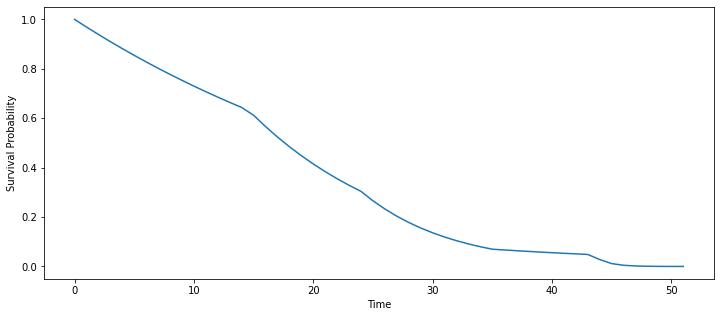

In [ ]:
x = df.drop(['t', 'e'], axis=1).iloc[2]
t = np.arange(df['t'].max())
model.plot_survival_function(t, x)